# Lab 1 - Introduction to Python for Data Science and Optimizing Loss Functions

## A. Introduction to Python

This is a very simple introductory lab to using Markdown and Python notebooks. It should give you a starting point to refresh the software working system. It is NOT meant to be a full tutorial. If you have never used Python before, I would suggest you take a few hours of the week to learn how to use it. Some resources are:

1. The [W3 School Tutorial](https://www.w3schools.com/python/python_intro.asp).
2. The list of [Python for Programmers](https://wiki.python.org/moin/BeginnersGuide/Programmers) course.

We assume you already know how to code and are a bit familiar with Python. If you are not, please invest time in the tutorials above. Otherwise, let's move on!

Python notebooks are a dynamic script that functions by mixing text cells, such as this one, with code cells, such as the one below. A notebook will be a collection of code cells and text, making it an excellent way to document code while running interactive jobs. Code cells are executed manually, so always keep an eye on the number besides the cell to remember what has been executed: ```[1]``` next to the cell means this is the first cell executed. If it is blank, it means the cell has not been executed yet.

### Markdown

Now we can use cells!

This is markdown cell. We can write **augmented html** here. Markdown has *many* options. I suggest reading the tutorial <a href="https://www.markdowntutorial.com/">here</a>.

Some basics:

- Starting a line with a dash ("-") creates a vignetted list.

- Writing a sentence between two asteriks (like `**this**`) **bolds it**.

- Writing a sentence between one asterisk (like `*this*`)*emphazises it* (italics).

- To write verbatim, use "code" formatting. Surrounding a sentence with grave accents writes it as you wrote it.  `I can write without getting words *emphasized* nor **bolded**`.

- To write a block of code, add three grave accents (```) both at the beginning and the end.

```
This is a block of code.
Many lines can be written verbatim.
**no bolding**, *nor emphasis* is applied.
```

To create an enumeration, simply add the number and a dot.

1. I am number one.

2. And I number two.

3. And me number three.

Titles and subtitles are written using multiple hash signs.

# Title 1
## Title 2
### Tittle 3


And, remember this is HTML! You can use everything the language offers. Some other useful tricks:

- Create a hyperlink: [I link to Google!](http://www.google.com). (Write `[I link to Google!](http://www.google.com)`, or more generally, `[any text you want](any address you want to go to)`)

- Add an image:

![University logo](https://www.uwo.ca/web_standards/img/logos-faculties-stacked/svg/Western_Logo_F_S_Science_RGB.svg)

Write `![University logo](https://www.uwo.ca/web_standards/img/logos-faculties-stacked/svg/Western_Logo_F_S_Science_RGB.svg)` or, more generally, `![alt-text](link-to-figure)`. You can also use relative paths if the figures are local, i.e., `![alt-text](Western_University_Logo.svg)` looks for 'Western_University_Logo.svg' in your own folder.

Many more things can be done. A short cheatsheet is available [here](https://github.com/adam-p/markdown-here/wiki/Markdown-Here-Cheatsheet)


## B. Numpy arrays and linear algebra
We will make signficant use of linear algebra during the lecture.  Matrix and vector multiplication are found in numerous places. Python has a very powerful package for numerical computation, called [```numpy```](https://numpy.org/). It comes with a very large library of mathematical functions, optimized to make use of modern computers. It also has a sister package called [```scipy```](https://scipy.org/) with more advanced tools for scientific computations. In this lab, we will use both, starting with numpy.

Let's revise some of the basic concepts in linear algebra.

### Linear algebra and dot products

In math, a vector $\mathbf{x} \in \mathbb{R}^n$ is usually understood to be a *column vector*.  That is, if I were to write out $\mathbf{x}$ then it would look like

$$ \mathbf{x} = \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{bmatrix} $$

When we write $\mathbf{x}^T$ that makes $\mathbf{x}$ a *row vector*.  So if I were to write out $\mathbf{x}^T$ it would look like

$$ \mathbf{x}^T = \begin{bmatrix} x_1 \,, x_2 \,, \cdots \,, x_n \end{bmatrix} $$

When I want to compute a dot product between two vectors $\mathbf{x}$ and $\mathbf{y}$, we write

$$ \mathbf{y}^T \mathbf{x} $$

Which means that this is the product between a *row vector* and a *column vector*.

Intuitively, we expect that Numpy behaves the same way. Numpy can sometimes lead to confusions because it can represent 1-dimensional vectors as either 1-d or 2-d arrays. To see this in action, let's first import the package and run a few calculations.

In [ ]:
# Import numpy as set an alias as np
import numpy as np

In [ ]:
# This is a one-dimensional numpy array
x = np.array([1,2,3])
y = np.array([4,5,6])

print('x looks like:')
print(x)
print('y looks like:')
print(y)

print(f"X and Y are 1-dimensional arrays, they both have the same shape. X: {x.shape}, Y: {y.shape}")

x looks like:
[1 2 3]
y looks like:
[4 5 6]
X and Y are 1-dimensional arrays, they both have the same shape. X: (3,), Y: (3,)


We can also store these column vectors in two-dimensional numpy arrays:

In [ ]:
# Now this is two dimensional
# Matrix Transpose
X = np.array([[1,2,3]]).T
Y = np.array([[4,5,6]]).T

print('X looks like:')
print(X)
print('Y looks like:')
print(Y)

print(f"X and Y are 2-dimensional arrays, they both have the same shape. X: {X.shape}, Y: {Y.shape}")

X looks like:
[[1]
 [2]
 [3]]
Y looks like:
[[4]
 [5]
 [6]]
X and Y are 2-dimensional arrays, they both have the same shape. X: (3, 1), Y: (3, 1)


### Dot products in numpy

The operator for dot products and matrix multiplication is the ```@``` symbol. With numpy imported, it will automatically calculate it. You can also use the functions [```np.matmult()```](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html#numpy.matmul). Numpy documentation suggests using the ```@``` operator, so be sure to use it!

The dot-product between two 2D-arrays behaves as we would expect:

In [ ]:
# row vector by column vector results in a scalar
# @ refers to matrix mutiplication in numpy
print(X.T@Y)
# The result is a matrix of dimentional 0

[[32]]


Actually, this is not a scalar, but a singleton array of shape (1,1). To transform it to a scalar, the function ```item()``` does the trick.

In [ ]:
# To express the result into number, instead of a 0-D marix, we use:
(X.T@Y).item()

32

So, matrix-wise, this is what we expected. What about 1-dimensional vectors? If `x` and `y` are "vectors", then numpy is allowing me to take the product of two column vectors without transposing one of them.  The answer is right, the dot product is 32, but 1-d numpy arrays do not behave like vectors.  

Indeed, the transpose operator leaves a 1-d array unchanged:

In [ ]:
print(x@y)
print(y@x)
print(x.T@y)
print(y.T@x)

# Important Notes:
# While mutiplying 2 matrix, the result is a matrix with one element, where
# the result of the mutiplication of two 1D array is an number

32
32
32
32


They are all the same! And they are all scalars, not singletons as we had with matrices. What happens if we attempt to mix 1-D and 2-D arrays?

In [ ]:
# X@y

As the dimensions are incorrect, the operations fail. Always be careful of operating in the correct dimension, and keep track of the shapes of your objects. If you are using matrices, stick to them. If you are using 1-dimensional arrays, same.

A useful function to transform 1-d arrays into 2-d arrays is the function `reshape`. We can transform or data into  `(n,1)` shaped arrays using `x.reshape(-1,1)`.  When you pass `-1` to reshape, you're telling numpy to infer the shape in that dimension.  So if I had an array, `z`, of 3 elements and I called `z.reshape(-1,1)`.  This will reshape the array to be a `(3,1)` array.  We didn't have to tell numpy the size for the first dimension, numpy inferred it from the size of the array.

Watch what happens when I now try to take the dot product between these two arrays.

In [ ]:
# reshape() function helps us to transfrom the array into a column vector
X = x.reshape(-1,1)
Y = y.reshape(-1,1)

print('X looks like:')
print(X)
print('Y looks like: ')
print(Y)

X looks like:
[[1]
 [2]
 [3]]
Y looks like: 
[[4]
 [5]
 [6]]


Now, these column vectors will behave like I would expect from vectors in linear algebra:

In [ ]:
(X.T@Y).item()

32

Possibly confusingly, numpy also defines a dot product between a 2-d array and a 1-d array

In [ ]:
X.T@y

array([32])

Note that the result now is a 1d-array. ```.item()``` also works here.

In [ ]:
(X.T@y).item()

32

Let's move on to learning how to read data using the most basic library: Pandas. We will move on to more sophisticated data management libraries (Polars and DuckDB) shortly.

## C. Pandas

`pandas` (short for Panel Data) is a python library which allows users to use R-like dataframes.  The functions mimic R's `data.frame` closely as they were the inspiration for `pandas`.

In this short tutorial, we'll go through some of the basic functionality of pandas.  **The library is very expansive, and you are encouraged to explore the documentation on your own**. I'm discovering new things about the library every day! At the end of this tutorial, you'll be able to work in data in pandas at a very basic level.

### Reading Data

Pandas offers lots of ways to read data into python. The most ubiqutous is likely `read_csv` which does what it says it does.

You can also read data from...:

* text files
* SQL databases
* JSON files
* Google Big Query

and more.

Check out the documentation on I/O for more on reading and writing data.  See here: https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html

First, let's import the data to our session, if you haven't done so. The package ```gdown``` provides functions that allow for easily doing so. It has both a python interface and a command line interface. I will use the command line one, which I can use by prepending an exclamation sign ```!``` to my code.


In [ ]:
!gdown https://drive.google.com/uc?id=10NK8zhrdEI9gJ9mzCeZTV0-K9vRm46CQ

Downloading...
From: https://drive.google.com/uc?id=10NK8zhrdEI9gJ9mzCeZTV0-K9vRm46CQ
To: /content/weather_2018_data.csv
100% 492k/492k [00:00<00:00, 7.94MB/s]


Now we can read the data. Pandas is normally imported with the ```pd``` alias. We will also use the powerful [`matplotlib`](https://matplotlib.org/) library for creating plots, and its companion [`seaborn`](https://github.com/mwaskom/seaborn) library.

In [ ]:
# Notes:
# Pandas is actually not useful in the modern situation anymore
# It loses memory efficiency

In [ ]:
# Pandas
import pandas as pd

# Graphic Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Make the notebook render the plots inline
%matplotlib inline
# Tell it to plot in the same line

Now we can read the data. It is London's weather data for a few months in February 2008.

In [ ]:
# Read the data from the CSV file
df = pd.read_csv('weather_2018_data.csv', parse_dates=['created_at'])

# Display the top 5 rows of the dataframe in HTML
display(df.head())

,created_at,apparentTemperature,humidity,precipIntensity,precipProbability,precipType,pressure,visibility,windBearing,windSpeed,wr
0,2018-01-02 06:28:33,-23.27,0.83,0.0,0.0,NoPrecip,1031.23,16.093,240.0,16.56,9.0
1,2018-01-02 06:58:21,-23.27,0.83,0.0,0.0,NoPrecip,1031.23,16.093,240.0,16.56,10.0
2,2018-01-02 07:27:11,-24.22,0.83,0.0,0.0,NoPrecip,1030.51,16.093,199.0,20.54,10.0
3,2018-01-02 07:58:38,-24.22,0.83,0.0,0.0,NoPrecip,1030.51,16.093,199.0,20.54,7.0
4,2018-01-02 08:27:15,-19.47,0.85,0.0,0.0,NoPrecip,1030.29,16.093,255.0,6.43,18.0


In [ ]:
df.tail()

,created_at,apparentTemperature,humidity,precipIntensity,precipProbability,precipType,pressure,visibility,windBearing,windSpeed,wr
6419,2018-12-29 10:58:00,-8.02,0.8,0.06,0.03,snow,1023.69,16.093,300.0,14.78,15.0
6420,2018-12-29 11:28:15,-8.02,0.8,0.03,0.02,snow,1024.28,16.093,320.0,14.78,18.0
6421,2018-12-29 11:57:46,-8.02,0.8,0.03,0.02,snow,1024.28,16.093,320.0,14.78,13.0
6422,2018-12-29 12:30:52,-7.17,0.8,0.06,0.03,snow,1024.01,16.093,320.0,11.16,12.0
6423,2018-12-29 13:06:43,-8.69,0.8,0.07,0.04,snow,1024.28,16.093,311.0,18.34,24.0


The property ```dtypes``` shows the data types of all columns.

In [ ]:
# .dtypes is showing the property of the df
# It does not come with () as it is not a function
print(df.dtypes)

created_at             datetime64[ns]
apparentTemperature           float64
humidity                      float64
precipIntensity               float64
precipProbability             float64
precipType                     object
pressure                      float64
visibility                    float64
windBearing                   float64
windSpeed                     float64
wr                            float64
dtype: object


And the function ```describe()``` shows the summary statistics of the numerical variables. Note categorical variables are not displayed.

In [ ]:
# Gives the summary statistics of the df
df.describe()

,created_at,apparentTemperature,humidity,precipIntensity,precipProbability,pressure,visibility,windBearing,windSpeed,wr
count,6424,6424.000000,6424.000000,5792.000000,5792.000000,6399.000000,6351.000000,6256.000000,6403.000000,6424.000000
mean,2018-06-25 15:37:58.095579136,6.906356,0.739849,0.111716,0.078816,1018.084435,14.054325,200.999361,11.946308,70.747821
min,2018-01-02 06:28:33,-27.090000,0.230000,0.000000,0.000000,992.400000,0.000000,0.000000,0.000000,4.000000
25%,2018-03-15 06:53:13.500000,-4.140000,0.640000,0.000000,0.000000,1013.200000,16.089000,114.000000,7.445000,40.000000
50%,2018-06-20 14:03:58.500000,4.020000,0.750000,0.000000,0.000000,1017.890000,16.093000,220.000000,11.160000,66.000000
75%,2018-10-01 18:42:51.249999872,19.140000,0.860000,0.040000,0.040000,1023.010000,16.093000,281.000000,16.560000,97.000000
max,2018-12-29 13:06:43,40.710000,1.000000,7.600000,1.000000,1044.190000,16.093000,359.000000,53.730000,224.000000
std,NaN,13.459258,0.164185,0.401877,0.192258,7.488594,4.331125,96.190407,6.866206,37.204815


As a first plot, we will use one that comes preprogrammed in Pandas. ```hist()``` is a function that provides a histogram of all variables in a dataset.

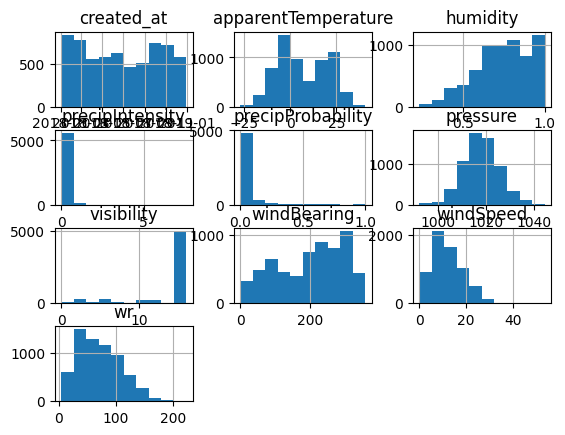

In [ ]:
# Obviously, the plot is ugly. We can improve it using seaborn, i.e sns.
histograms = df.hist()

Not the prettiest, but it gives us information. We can make a nicer one using seaborn. Normally, you can use seaborn to generate a pretty graph, and then finetune the output using matplotlib's functions, as we do below. Let's import the package and create a plot, and save it in both PDF format and JPG format.

In [ ]:
# Configure the basic structure of the plots
sns.set_theme(color_codes=True)

# Create a pairplot in seaborn. Takes a while as several plots are run.
sns.pairplot(df)

# Use matplotlib to tweak the outcome and save the plot as a PDF and JPG file
plt.savefig('Hist.pdf')
plt.savefig('Hist.jpg')

# Show the plot inlined in the notebook
plt.show()

Output hidden; open in https://colab.research.google.com to view.

Now let's slice and dice the data a bit. Pandas has several ways to do this. In general, we can split slicing and dicing into three groups:

1. Slicing and dicing using variable names. This one requires no extra property.
1. Slicing and dicing based on attributes or characteristics of the data, or doing conditional filters. These ones are indexed using the ```.loc``` property.
2. Slicing and dicing using numerical indexes. This one requires using the ```.iloc``` property.

Note these are properties, not functions, so they use square brackets, not round parenthesis.

In [ ]:
# Select all rows and the 'pressure' column
# Important Notes: [row, column]
# [:,] means getting all rows
# [,"pressure"] means getting all "pressure" column
# Combine them -> Getting all rows with column "pressure"
df.loc[:, 'pressure']

,pressure
0,1031.23
1,1031.23
2,1030.51
3,1030.51
4,1030.29
...,...
6419,1023.69
6420,1024.28
6421,1024.28
6422,1024.01


In [ ]:
# Select the first 10 rows and the 'pressure' column, for days with pressure below 1020 mmHg. Note the use of .loc[] to filter the rows
# Similar to the last segement of code, using the rule of [row, column]
# [df.loc[:, 'pressure'] < 1020,] means getting all rows with the value of the column "pressure" below 1020
# [,:] means getting all columns
# .head(10) means getting the first 10 rows that satisfy our condition
df.loc[df.loc[:, 'pressure'] < 1020, :].head(10)

,created_at,apparentTemperature,humidity,precipIntensity,precipProbability,precipType,pressure,visibility,windBearing,windSpeed,wr
23,2018-01-03 07:28:47,-18.99,0.76,0.0,0.0,NoPrecip,1019.89,16.093,209.0,7.67,17.0
24,2018-01-03 07:52:53,-18.99,0.76,0.0,0.0,NoPrecip,1019.89,16.093,209.0,7.67,23.0
25,2018-01-03 08:31:06,-18.07,0.72,0.0,0.0,NoPrecip,1019.42,16.093,213.0,8.18,27.0
26,2018-01-03 08:59:42,-18.07,0.72,0.0,0.0,NoPrecip,1019.42,16.093,213.0,8.18,29.0
27,2018-01-03 09:29:12,-17.62,0.72,0.0,0.0,NoPrecip,1018.99,16.093,215.0,7.24,34.0
28,2018-01-03 09:58:35,-17.62,0.72,0.0,0.0,NoPrecip,1018.99,16.093,215.0,7.24,18.0
29,2018-01-03 10:28:51,-16.07,0.71,0.0,0.0,NoPrecip,1018.91,16.093,217.0,6.53,23.0
30,2018-01-03 10:59:53,-16.07,0.71,0.0,0.0,NoPrecip,1018.91,16.093,217.0,6.53,24.0
31,2018-01-03 11:30:56,-15.87,0.70,0.0,0.0,NoPrecip,1018.42,9.657,244.0,8.56,33.0
32,2018-01-03 12:31:18,-18.08,0.73,0.0,0.0,NoPrecip,1017.49,4.831,221.0,18.34,38.0


In [ ]:
# Obtaining the numbers of days with pressure below 1020 mmHg
# Boolean condition: All the rows with the value of column "pressure" below 1020
# The result shows the number of rows that satisfy our conditon
print(np.sum(df.loc[:, 'pressure'] < 1020))
print(np.sum(df.loc[:, 'pressure'] < 1020).item())

3839
3839


Here we made use of the fact that booleans are interpreted as the number 1 if their value is `True`.

In [ ]:
# loc is used for conditions and names
# iloc is for index location (Integer indexing)

# Important notes for Python:
# (1) Index starts at zero
# (2) In row / column selection, the upper bound is excluded

# It shows the first 5 rows: row 0,1,2,3,4
# and the second column: column 1
df.iloc[0:5, 1:2]

,apparentTemperature
0,-23.27
1,-23.27
2,-24.22
3,-24.22
4,-19.47


The `created_at` column contains dates.  We can extract different parts of those dates with some other methods!

Let's creat columns for the month and time the data was observed.

You can read more on timeedeltas and timestamps here: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

In [ ]:
df.iloc[:,0:1].head(5)

,created_at
0,2018-01-02 06:28:33
1,2018-01-02 06:58:21
2,2018-01-02 07:27:11
3,2018-01-02 07:58:38
4,2018-01-02 08:27:15


In [ ]:
# We can seperate the column into date and time as the dtype of the column is "datetime"

# Create a new column for time
df['time'] = df.created_at.dt.hour

# Create a new column for month
df['month'] = df.created_at.dt.month_name()

In [ ]:
df['time'].head()

,time
0,6
1,6
2,7
3,7
4,8


In [ ]:
df['month'].head()

,month
0,January
1,January
2,January
3,January
4,January


Sometimes, you want to know a summary of the data per group.  The average number of people in th weight room changes by month.  Let's use `groupby` to summarize by month.

You can learn more about aggregation here: https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html

In [ ]:
# Aggregate by month to find mean number of people in weight room
# We know that ".wr" means taking the property, i.e. column "wr" from the df
# We group by month and then calculate the mean of wr of each month
df.groupby('month').wr.mean()

,wr
month,
April,77.282609
August,32.703125
December,59.504673
February,82.136915
January,98.309013
July,38.852130
June,42.929104
March,89.785388
May,43.099638


### Categorical data

Inspired by `factors` in R, `pandas` uses `pd.Categorical` to turn categorical variables into a `CategoricalDtype` column.

You can read more about categorical data here: https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html

In [ ]:
# Note that the previous result with alphabetical order, which is clearly not we want.
# Therefore, we should convert "months" into ordered variable

# Turn months into an ORDERED categorical variable

# First, we create a list storing the months in calender order
months = ['January','February','March','April','May','June','July','August','September','October','November','December']

# Then, we use pd.Categorial() to create a categorial variable
# 1st input indicates the column in the df
# 2nd input indicates it is a ordered varibale
# 3rd input indictaes the specfic order we wanna use
# At last, we store result (overwrite) in the original df
df['month'] = pd.Categorical(df.month, ordered = True, categories=months)

# Watch what happens when we group by an ordered categorical variable
df.groupby('month', observed=True).wr.mean()

,wr
month,
January,98.309013
February,82.136915
March,89.785388
April,77.282609
May,43.099638
June,42.929104
July,38.852130
August,32.703125
September,90.729927


Categorical columns become really important when you are transforming data for learning.  A lot of analyses will have you one-hot-encode a categorical variable.  You can do this with pandas if your column is categorical.

In [ ]:
# One Hot Encode Months
pd.get_dummies(df.month)

,January,February,March,April,May,June,July,August,September,October,November,December
0,True,False,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
6419,False,False,False,False,False,False,False,False,False,False,False,True
6420,False,False,False,False,False,False,False,False,False,False,False,True
6421,False,False,False,False,False,False,False,False,False,False,False,True
6422,False,False,False,False,False,False,False,False,False,False,False,True


Always remember to drop one of the categories if you are using this method for prediction, to avoid multicollinearity.

In [ ]:
# Important Note:
# Drop one column to avoid multicollinearity.

# You can, arbitrarily, drop the first column. This is useful to avoid multicollinearity.
pd.get_dummies(df.month, drop_first=True)

,February,March,April,May,June,July,August,September,October,November,December
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
6419,False,False,False,False,False,False,False,False,False,False,True
6420,False,False,False,False,False,False,False,False,False,False,True
6421,False,False,False,False,False,False,False,False,False,False,True
6422,False,False,False,False,False,False,False,False,False,False,True


Now we are finally ready to implement our own regressions.

## C. A simple regression

Let's implement a linear regression manually, and compare it with a standard method. As discussed in the lecture, the solution to the regression problem is, for a data matrix $X$ and a target vector $Y$:

$$
Β=(𝑋^𝑇 \cdot 𝑋)^{−1} \cdot 𝑋^𝑇 \cdot 𝑌
$$

We could use this formula, or we could solve an optimization problem with our own loss function. Let's do the latter. Let's start by defining the mean square error function.

In [ ]:
# Mean squared error for the two vectors y_pred and y_real.
def mse(y_real, y_pred):
    # Make sure both vectors are numpy arrays of the same shape
    y_real = np.array(y_real).reshape(-1,1)
    y_pred = np.array(y_pred).reshape(-1,1)

    # Check that the two vectors have the same shape
    # If true, nth happens, else, throw an error
    assert y_real.shape == y_pred.shape, "The two vectors must have the same shape"

    return np.mean((y_real - y_pred)**2)


We will assume a functional form such that:
$$
f(x) = \beta^T \cdot x + \varepsilon
$$

In [ ]:
def linear_regression(beta, X):
    # Correct the shape of beta and X if necessary
    # The correction is needed since if there is a 1-D array with 3 elements, the dimension will be (3,)
    # The reshape() function transforms the dimension into (3,1)
    if len(beta.shape) == 1:
        beta = beta.reshape(-1,1)
    if len(X.shape) == 1:
        X = X.reshape(-1,1)

    # Make sure the number of columns in beta is the same as the number of rows in X
    # Otherwise, we cannot perform matrix multiplication
    if beta.shape[0] != X.shape[1]:
        raise Exception(f"Number of columns in beta ({beta.shape[0]}) is different from the number of rows in X ({X.shape[1]})")

    # Return the dot product of X and beta
    return X@beta

Now we are ready to run our first linear regression. Let's do something simple, regress two variables, humidity and visilibility, with the observed pressure. For this, we will create a dataframe that has all three variables, add a constant term of ones, and define the beta parameter vector as a four row vector.

In [ ]:
## Define the beta vector
# First, we create a coefficient vector, where
# 1st element refers to the intercept (constant term) and
# 2nd & 3rd element refers to "visibility" and "humidity" respectively.

# Note: Vector beta is usually determined through a fitting process,
# now, it is just created with placeholder values
beta = np.array([1,1,1])


## Create a vector with False if the row has any NaN value
# Then, we select all rows with columns 'visibility', 'humidity' and 'pressure'
# isna() checks for NaN values, return TRUE if the column has NaN values, FALSE otherwise
# any(axis=1) means the isna() function is applied for any of the selected columns, now it return TRUE when there is at least one NaN values in a row
# np.invert() inverts the boolean series, now it return TRUE when the row has no NaN value
has_nan = np.invert(df.loc[:, ['visibility', 'humidity', 'pressure']].isna().any(axis=1))


## Define the X matrix from the dataframe columns. Drop any null values.
# We select the rows with has_nan == TRUE, i.e. no NaN value
# We select the columns: 'visibility' and 'humidity', the predictor variables
X = df.loc[has_nan, ['visibility', 'humidity']]


## Add a column of ones to the X matrix for the constant term
# For the intercept term, we create a columns of ones in matix (same row as X with one column)
# np.stack() function helps us to stack the array horizontally
# Now, column 1 of X is all ones, where column 2 & 3 are the predictor variables
X = np.hstack([np.ones((X.shape[0], 1)), X])

# Define the y vector from the dataframe column
# Extract all the rows (with no NaN values) with the target variable "pressure"
# Transform the dimension of the column vector using reshape() function
y = np.array(df.loc[has_nan, 'pressure']).reshape(-1,1)

print(f"X shape: {X.shape}, y shape: {y.shape}, beta shape: {beta.shape}")

X shape: (6351, 3), y shape: (6351, 1), beta shape: (3,)


In [ ]:
X

array([[ 1.   , 16.093,  0.83 ],
       [ 1.   , 16.093,  0.83 ],
       [ 1.   , 16.093,  0.83 ],
       ...,
       [ 1.   , 16.093,  0.8  ],
       [ 1.   , 16.093,  0.8  ],
       [ 1.   , 16.093,  0.8  ]])

In [ ]:
y

array([[1031.23],
       [1031.23],
       [1030.51],
       ...,
       [1024.28],
       [1024.01],
       [1024.28]])

In [ ]:
# 1-D vector
beta

array([1, 1, 1])

Let's see how good were our beta guesses. Let's calculate the output of our linear regression and plot the predictions and the real values.

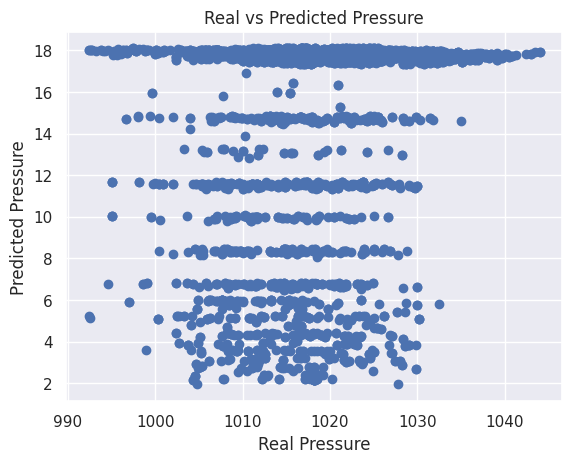

In [ ]:
# Predict the pressure using the linear regression model
y_pred = linear_regression(beta, X)

# Plot a scatter plot of the real pressure values against the predicted pressure values
plt.scatter(y, y_pred)
plt.xlabel('Real Pressure')
plt.ylabel('Predicted Pressure')
plt.title('Real vs Predicted Pressure')
plt.show()

# If the model is good, i.e. real pressure should be the same, or similar to the predicted values
# Therefore, it should be a scatterplot with straight line
# Here, ofc, is not, since we are just predicting using random beta: (1,1,1)

Well... Our model is terrible. Of course, there is no optimization of any kind done!

Scipy has the very useful module (or subpackage) [`scipy.optimize`](https://docs.scipy.org/doc/scipy/reference/optimize.html#module-scipy.optimize) with a set of very useful optimization functions that we can use.

We will use the [`scipy.minimize()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize) function to optimize our regression using our loss. First, we need a first guess for the values, and then the method will find the solution using a Newton-Rhapson algorithm or any other you give it. Note that the function requires a 1-D vector as input, that's why I defined the $\beta$ vector in that way.

In [ ]:
# Import the package
from scipy.optimize import minimize

# Create the first guess
beta0 = np.array([1.1,-1,0])

# Define the loss function
def loss(beta, X, y):
    y_pred = linear_regression(beta, X)
    return mse(y, y_pred)

# Minimize the loss function
res = minimize(loss, beta0, args=(X, y))

# Get the optimal beta values
beta_opt = res.x

# Print them
print(f"The optimal beta values are: {beta_opt}")

The optimal beta values are: [ 1.02283223e+03  1.57086948e-01 -9.47223191e+00]


Let's check the convergence results

In [ ]:
res

# Interpretation of the output of res
# Sucecess: TRUE -> Yeah
# fun: Output of the loss function, here we used MSE, so the MSE is 51.5
# nit: Number of iteration
# jac: Jacobian / Gradient -> We want the values of jac close to 0, as we partial differntiate each variable and set them to zero for optimisation
# hess_inv: Result of 2nd derivatives -> To see whether it is max or min

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 51.51712186065405
        x: [ 1.023e+03  1.571e-01 -9.472e+00]
      nit: 17
      jac: [ 0.000e+00  1.431e-06 -4.768e-07]
 hess_inv: [[ 2.908e+01 -7.972e-01 -2.353e+01]
            [-7.972e-01  3.416e-02  4.306e-01]
            [-2.353e+01  4.306e-01  2.363e+01]]
     nfev: 88
     njev: 22

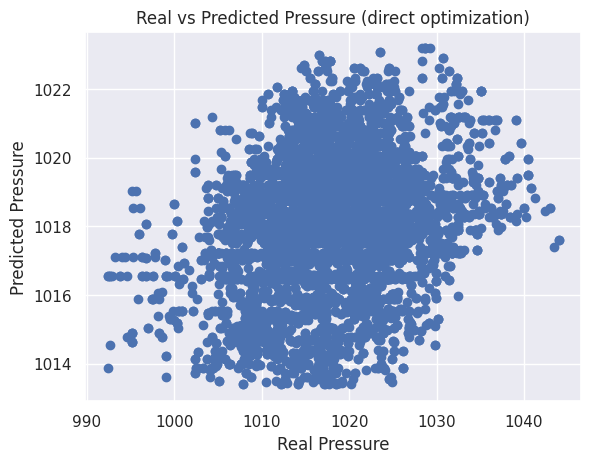

In [ ]:
# Predict the pressure using the optimal beta values
y_pred_opt = linear_regression(beta_opt, X)

# Plot a scatter plot of the real pressure values against the predicted pressure values
plt.scatter(y, y_pred_opt)
plt.xlabel('Real Pressure')
plt.ylabel('Predicted Pressure')
plt.title('Real vs Predicted Pressure (direct optimization)')
plt.show()

# Better than the last one, but ... not perfect

### Comparison with scikit-learn.

The core machine learning package in Python is called [`scikit-learn`](https://scikit-learn.org/stable/). It is a very extensive package, and we will just scratch its surface during the course with the main methods it has available. For this tutorial, let's calculate the output for the same regression. The function is called [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [ ]:
# Import the package
from sklearn.linear_model import LinearRegression

In [ ]:
# Create the model.
# As our X matrix already has a column of ones, we don't need to add an intercept term
# Usually, we do not have the constant term (column), then we need to add it by fit_intercept=TRUE
model = LinearRegression(fit_intercept=False)

# Fit the model
model.fit(X, y)

LinearRegression(fit_intercept=False)

In [ ]:
# Get the beta values
beta_sklearn = model.coef_
beta_sklearn

array([[ 1.02283224e+03,  1.57086758e-01, -9.47224151e+00]])

Almost identical!! Any deviation may be due to small numerical errors in the optimization. Pretty good! In fact, we can see the correlation between the predicted values is very high.

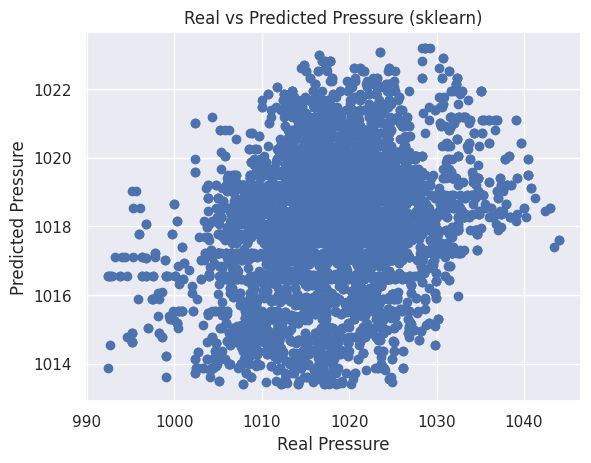

In [ ]:
# Predict the pressure using the sklearn model
y_pred_sk = model.predict(X)

# Plot a scatter plot of the real pressure values against the predicted pressure values
plt.scatter(y, y_pred_sk)
plt.xlabel('Real Pressure')
plt.ylabel('Predicted Pressure')
plt.title('Real vs Predicted Pressure (sklearn)')
plt.show()

In [ ]:
# Calculate the correlation between the sklearn predictions and the direct optimization predictions
np.corrcoef(y_pred_sk.flatten(), y_pred_opt.flatten())[0,1]

0.9999999999998592

Excellent! We can see how both methods are almost identical. For this week's homework, you will implement a different type of regression and run similar comparisons.